<a href="https://colab.research.google.com/github/VIbhorKumar98/Covid19-Fake-news-detection/blob/main/COVID_19_Fake_News_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#Import Libraries
import numpy as np      #numpy is used for mathematical operations
import pandas as pd     #pandas is used for dataframe operations
import matplotlib.pyplot as plt   #matplotlib is useful for plotting
import seaborn as sns     #seaborn is useful for plotting
import nltk               #nltk is called as Natural Language ToolKit
import missingno          #This is Missing Data Visualization Tool
from nltk.tokenize import word_tokenize          #Useful for tokenization
from nltk.corpus import stopwords   #Natural Language ToolKit has corpus which contains a large amount of set of texts. 
#Stopwords are those words which does not convey a lot of meaning & hence can be ignored or removed from the text.
from nltk.stem.porter import PorterStemmer  #nltk.stem is a package.
from nltk.stem import PorterStemmer         #nltk.stem package perform stemming.
                                            #With the help of stemmer, we can get the root of the words. 
                                            #Importing this will be helpful because multiple words convey similar meaning.
                    
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer     
from wordcloud import WordCloud,STOPWORDS
import re 
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/Machine Learning Bonus Project/train.csv")
df_train.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [4]:
train_limit = int(len(df_train))

In [5]:
train_limit

6420

In [6]:
df_train.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [ ]:
#missingno.bar(df_train)

In [7]:
df_test = pd.read_csv("/content/drive/MyDrive/Machine Learning Bonus Project/validation.csv")
df_test.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real


In [8]:
df_test_id = df_test['id']

In [9]:
df = df_train.append(df_test, ignore_index = True) 

In [10]:
df

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
8555,2136,Donald Trump wrongly claimed that New Zealand ...,fake
8556,2137,Current understanding is #COVID19 spreads most...,real
8557,2138,Nothing screams “I am sat around doing fuck al...,fake
8558,2139,Birx says COVID-19 outbreak not under control ...,fake


In [11]:
df.tweet[1]

'States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux'

In [12]:
import re
str = 'This is a tweet with a url: http://t.co/0DlGChTBIx'
clean_tweet = re.match('(.*?)http.*?\s?(.*?)', str)
print(clean_tweet)

<_sre.SRE_Match object; span=(0, 32), match='This is a tweet with a url: http'>


In [13]:
def split_dataset(sample, label, limit):
    X_train, X_test = sample[:limit], sample[limit:]
    y_train, y_test = label[:limit], label[limit:]
    return X_train, X_test, y_train, y_test

In [14]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [15]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
'''corpus = []
for i in range(len(df)):
    tweet = re.sub('(.*?)http.*?\s?(.*?)', ' ', df['tweet'][i])
    tweet = re.sub(r'https?:\/\/\S*', '', df['tweet'][i], flags=re.MULTILINE)
    tweet = re.sub('[^a-zA-Z0-9]', ' ', df['tweet'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    #tweet = [ps.stem(word) for word in tweet if not word in stopwords.words('english')]
    tweet = [lemmatizer.lemmatize(word) for word in tweet if not word in stopwords.words('english')]    
    tweet = ' '.join(tweet)
    corpus.append(tweet)''

In [ ]:
#cv = CountVectorizer(max_features = 14000, ngram_range = (1,2))
#X = cv.fit_transform(corpus).toarray()
'''tv = TfidfVectorizer(max_features = 14000)
X = tv.fit_transform(corpus).toarray()
y = pd.get_dummies(df['label'])
y = y.iloc[:,1].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test = split_dataset(X, y, 6420)
fake_news_model = MultinomialNB().fit(X_train, y_train)
y_pred = fake_news_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy'''

0.9191588785046729

In [21]:
#Creating Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
'''cv = CountVectorizer(max_features = 15000)
X = cv.fit_transform(corpus).toarray()'''

#Creating TF-IDF model
#from sklearn.feature_extraction.text import TfidfVectorizer
#tv = TfidfVectorizer()
#tv = TfidfVectorizer(max_features = 10161)
#X = tv.fit_transform(corpus).toarray()

'cv = CountVectorizer(max_features = 15000)\nX = cv.fit_transform(corpus).toarray()'

In [26]:
corpus = []
for i in range(len(df)):
    tweet = re.sub(r"http\S+", ' ', df['tweet'][i])
    tweet = re.sub('(.*?)http.*?\s?(.*?)', ' ', df['tweet'][i])
    tweet = re.sub(r'https?:\/\/\S*', '', df['tweet'][i], flags=re.MULTILINE)
    tweet = re.sub('[^a-zA-Z0-9]', ' ', df['tweet'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    #tweet = [ps.stem(word) for word in tweet if not word in stopwords.words('english')]
    tweet = [lemmatizer.lemmatize(word, pos='v') for word in tweet if not word in stopwords.words('english')]    
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [27]:
tv = TfidfVectorizer(max_features = 14800, ngram_range = (1,2))
X = tv.fit_transform(corpus).toarray()

y = pd.get_dummies(df['label'])
y = y.iloc[:,1].values

#Train Test Split
X_train, X_test, y_train, y_test = split_dataset(X, y, 6420)


#Training model using Naive bayes classifier
fake_news_model = MultinomialNB().fit(X_train, y_train)
y_pred = fake_news_model.predict(X_test) 


# Accuracy 
accuracy = accuracy_score(y_test, y_pred)
print('Maximum accuracy: ', accuracy)

Maximum accuracy:  0.9322429906542056


# Applying SVM

In [28]:
from sklearn.svm import SVC
from sklearn import svm


In [29]:

fake_news_model_svm = svm.SVC()

fake_news_model_svm.fit(X_train, y_train)
y_pred_svm = fake_news_model_svm.predict(X_test) 

In [30]:
accuracy_score(y_test, y_pred_svm)

0.944392523364486

# XGBoost Classifier

In [61]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [62]:
xgboosting = XGBClassifier(n_estimators=1000, \
                          learning_rate = 0.09, \
                          gamma = 2, \
                          max_depth=12, \
                          min_child_weight = 1, \
                          colsample_bytree=0.5, \
                          subsample=0.8, \
                          reg_alpha=1, \
                          objective='binary:logistic'
                        )

In [63]:
xgboosting.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=2,
              learning_rate=0.09, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [64]:
y_pred_xgb = xgboosting.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred_xgb)

0.9271028037383178

# Test Data

In [31]:
sub_test = pd.read_csv("/content/drive/MyDrive/Machine Learning Bonus Project/test.csv")

In [32]:
sub_test

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...
...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...


In [33]:
sub_test_id = sub_test['id']

In [34]:
corpus_test = []
for i in range(len(sub_test)):
    tweet = re.sub('(.*?)http.*?\s?(.*?)', ' ', sub_test['tweet'][i])
    tweet = re.sub(r'https?:\/\/\S*', ' ', sub_test['tweet'][i], flags=re.MULTILINE)
    tweet = re.sub('[^a-zA-Z0-9]', ' ', sub_test['tweet'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    #tweet = [ps.stem(word) for word in tweet if not word in stopwords.words('english')]
    tweet = [lemmatizer.lemmatize(word) for word in tweet if not word in stopwords.words('english')]    
    tweet = ' '.join(tweet)
    corpus_test.append(tweet)

In [35]:
tv_test = TfidfVectorizer(max_features = 14800, ngram_range = (1,2))
X_sub = tv_test.fit_transform(corpus_test).toarray()

In [54]:
#SVM
y_pred_svm_sub = fake_news_model_svm.predict(X_sub)

In [55]:
answer_list = []
for i in y_pred_svm_sub:
    if i==0:
        answer_list.append("fake")
        
    else:
        answer_list.append("real")

In [51]:
#Naive BAIS
y_pred_NB_sub = fake_news_model.predict(X_sub)

In [52]:
answer_list_NB = []
for i in y_pred_NB_sub:
    if i==0:
        answer_list_NB.append("fake")
        
    else:
        answer_list_NB.append("real")

In [66]:
#XGBoost Classifier
y_pred_xgb_sub = xgboosting.predict(X_sub)

In [67]:
answer_list_xgb = []
for i in y_pred_xgb_sub:
    if i==0:
        answer_list_xgb.append("fake")
        
    else:
        answer_list_xgb.append("real")

In [68]:
answer_list_xgb

['fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 

# For Submission

In [47]:
from google.colab import files 

In [41]:
answer_list

['fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 

In [42]:
sub_test_id

0          1
1          2
2          3
3          4
4          5
        ... 
2135    2136
2136    2137
2137    2138
2138    2139
2139    2140
Name: id, Length: 2140, dtype: int64

In [69]:
len(answer_list_xgb)

2140

In [70]:
submission_df = pd.DataFrame(
    {'id': sub_test_id,
     'label': answer_list_xgb,
    })

In [71]:
submission_df

,id,label
0,1,fake
1,2,fake
2,3,fake
3,4,fake
4,5,fake
...,...,...
2135,2136,fake
2136,2137,fake
2137,2138,fake
2138,2139,fake


In [72]:
submission_df.to_csv("answer.csv", index=False)
files.download('answer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

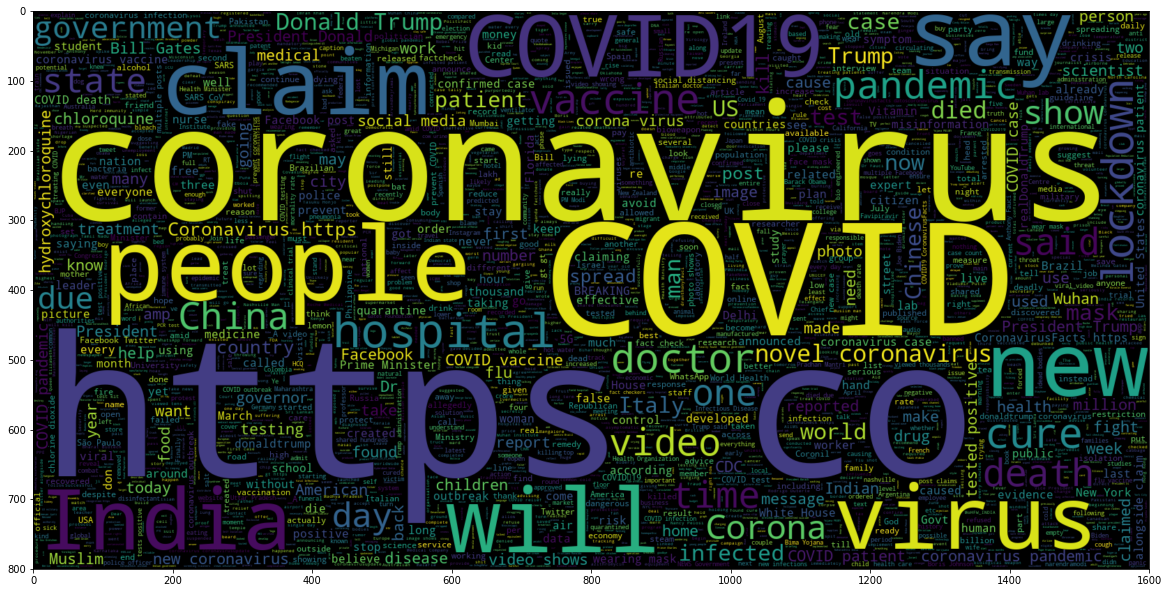

In [ ]:
#Words of fake news
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.label == 'fake'].tweet))
plt.imshow(wc , interpolation = 'bilinear')

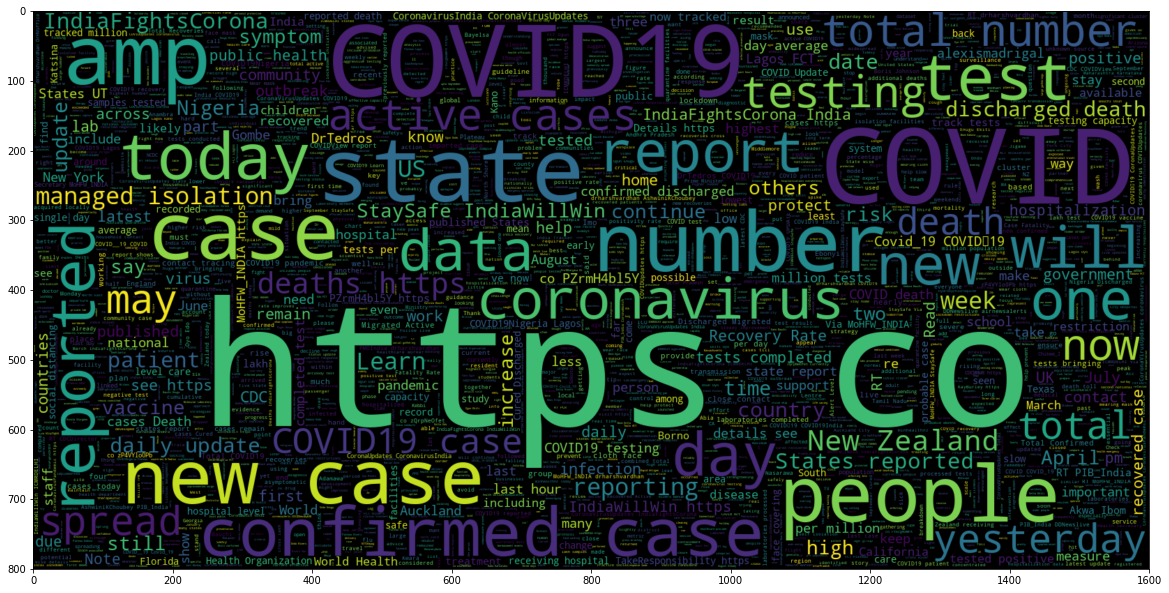

In [ ]:
#Words of real news
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.label == 'real'].tweet))
plt.imshow(wc , interpolation = 'bilinear')

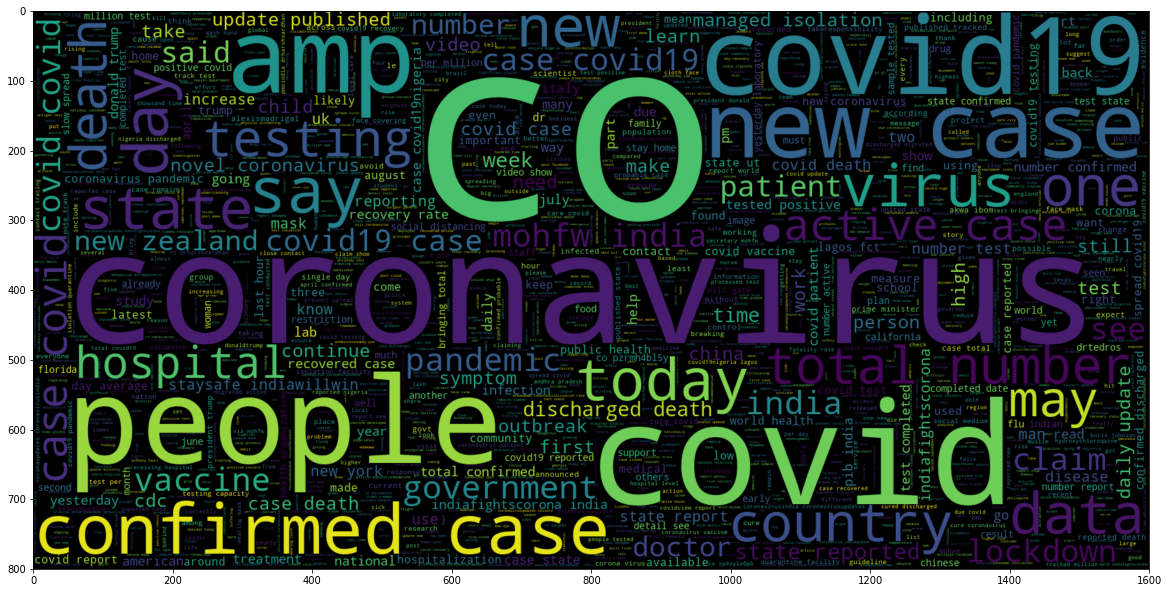

In [ ]:
#Words of real and fake news after data preprocessing
plt.figure(figsize = (20,20))
#wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(jobs[jobs.fraudulent == 0].text))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(' '.join(corpus))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
df[df.label == 'fake'].tweet

2       Politically Correct Woman (Almost) Uses Pandem...
7       Obama Calls Trump’s Coronavirus Response A Cha...
8       ???Clearly, the Obama administration did not l...
9       Retraction—Hydroxychloroquine or chloroquine w...
11      The NBA is poised to restart this month. In Ma...
16      Because of Donald Trump's negligence and incom...
19      Multiple Facebook posts claim that “Aussies wi...
20      No Nobel Prize laureate Tasuku Honjo didn't sa...
22      BREAKING NEWS# The president Cryill Ramaphosa ...
25      Elon Musck To New Baby; Get A Job Kid! https:/...
26      _A new alcohol-free sanitizer has been develop...
30      .@realDonaldTrump has shifted his focus at dif...
31      Doctored image of President Donald Trump share...
33      CDC Recommends Mothers Stop Breastfeeding To B...
34      Singapore Airlines Haults All Flights Due To C...
35      Florida Governor Ron DeSantis Botches COVID-19...
37      NYT invented the video of a doctor fighting co...
39      ALERT:

In [ ]:
corpus

['cdc currently report 99031 death general discrepancy death count different source small explicable death toll stand roughly 100000 people today',
 'state reported 1121 death small rise last tuesday southern state reported 640 death http co yasgrtt4ux',
 'politically correct woman almost us pandemic excuse reuse plastic bag http co thf8gunfpe coronavirus nashville',
 'indiafightscorona 1524 covid testing laboratory india 25th august 2020 36827520 test done profbhargava dg icmrdelhi staysafe indiawillwin http co yh3zxknnhz',
 'populous state generate large case count look new case per million today 9 smaller state showing case per million california texas al ar id k ky la m nv sc http co 1pyw6cwras',
 'covid act found average person illinois covid 19 infecting 1 11 people data show infection growth rate declined time factor stay home order restriction put place http co hhigdd24fe',
 'tested positive covid19 symptom stay home away people learn cdc recommendation around others covid 19 i

In [ ]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [ ]:
corpus = remove_URL(corpus)

TypeError: expected string or bytes-like object

In [ ]:
for i in range(0, 16430, 500):
    print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000


In [ ]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(df.tweet[0]) 
print(df.tweet[0])
word_tokens_after_removing_sw = [w for w in word_tokens if not w in stop_words]
print('\n Total number of tokens in tokens list: ', len(word_tokens))
print('\n Total number of tokens in after removing stop words: ', len(word_tokens_after_removing_sw))

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.

 Total number of tokens in tokens list:  32

 Total number of tokens in after removing stop words:  26


In [ ]:
import string  
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
set(string.punctuation)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [ ]:
punctuation_marks = set(string.punctuation)
print(len(stop_words))
print(len(punctuation_marks))

179
32


In [ ]:
stop_words_with_punctuation_marks = stop_words.union(punctuation_marks)

In [ ]:
print(len(stop_words_with_punctuation_marks))

211


In [ ]:
word_tokens_after_removing_sw_and_pm = [w for w in word_tokens if not w in stop_words_with_punctuation_marks]
print('Word tokens after removing stop words and punctuation marks are as follows: \n')
print(word_tokens_after_removing_sw_and_pm)
print('\n Total number of tokens after removing stop words and punctuation marks: ', len(word_tokens_after_removing_sw_and_pm))

Word tokens after removing stop words and punctuation marks are as follows: 

['The', 'CDC', 'currently', 'reports', '99031', 'deaths', 'In', 'general', 'discrepancies', 'death', 'counts', 'different', 'sources', 'small', 'explicable', 'The', 'death', 'toll', 'stands', 'roughly', '100000', 'people', 'today']

 Total number of tokens after removing stop words and punctuation marks:  23


In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
words = word_tokens_after_removing_sw_and_pm
#for w in words: 
    #print(w, " : PS --> ", porter.stem(w),", LS --> ", lancaster.stem(w)) 
print()
print("{0:20}{1:20}{2:20}{3:20}{4:20}".format('Word', 'Porter Stemmer', 'Lancaster Stemmer', 'SnowBall Stemmer', 'Wordnet Lemmetizer'))
print()
for w in words:
    print("{0:20}{1:20}{2:20}{3:20}{4:20}".format(w, porter.stem(w), lancaster.stem(w), snowball.stem(w), wordnet_lemmatizer.lemmatize(w)))
#wordnet_lemmatizer.lemmatize(w, pos="v")


Word                Porter Stemmer      Lancaster Stemmer   SnowBall Stemmer    Wordnet Lemmetizer  

The                 the                 the                 the                 The                 
CDC                 cdc                 cdc                 cdc                 CDC                 
currently           current             cur                 current             currently           
reports             report              report              report              report              
99031               99031               99031               99031               99031               
deaths              death               death               death               death               
In                  In                  in                  in                  In                  
general             gener               gen                 general             general             
discrepancies       discrep             discrep             discrep             discrepan

In [ ]:
def process_text(text):
    lst = []
    for i in text.split():
        if i.strip().lower() not in stop_words_with_punctuation_marks:
            word = wordnet_lemmatizer.lemmatize(i.strip())
            lst.append(word.lower())
    return ' '.join(lst) 

In [ ]:
df.tweet = df.tweet.apply(process_text)

In [ ]:
df.tweet.head()

0    cdc currently report 99031 deaths. general dis...
1    states reported 1121 death small rise last tue...
2    politically correct woman (almost) uses pandem...
3    #indiafightscorona: 1524 #covid testing labora...
4    populous state generate large case count look ...
Name: tweet, dtype: object

In [ ]:
df['tweet'] = df['tweet'].str.replace('[^a-zA-Z]', ' ')

In [ ]:
df.tweet.head()

0    cdc currently report       deaths  general dis...
1    states reported      death small rise last tue...
2    politically correct woman  almost  uses pandem...
3     indiafightscorona        covid testing labora...
4    populous state generate large case count look ...
Name: tweet, dtype: object

In [ ]:
df['tweet'] = df['tweet'].str.lower()
print(df['tweet'][0])

cdc currently report       deaths  general discrepancy death count different source small explicable  death toll stand roughly        people today 


In [ ]:
df['length_of_text'] = df['tweet'].str.len()
print(df['length_of_text'].head())

0    147
1    111
2    121
3    168
4    183
Name: length_of_text, dtype: int64


In [ ]:
df['word_tokens'] = df['tweet'].str.split()
df['word_tokens'].head()

0    [cdc, currently, report, deaths, general, disc...
1    [states, reported, death, small, rise, last, t...
2    [politically, correct, woman, almost, uses, pa...
3    [indiafightscorona, covid, testing, laboratory...
4    [populous, state, generate, large, case, count...
Name: word_tokens, dtype: object

In [ ]:
df.head()

,id,tweet,label,length_of_text,word_tokens
0,1,cdc currently report deaths general dis...,real,147,"[cdc, currently, report, deaths, general, disc..."
1,2,states reported death small rise last tue...,real,111,"[states, reported, death, small, rise, last, t..."
2,3,politically correct woman almost uses pandem...,fake,121,"[politically, correct, woman, almost, uses, pa..."
3,4,indiafightscorona covid testing labora...,real,168,"[indiafightscorona, covid, testing, laboratory..."
4,5,populous state generate large case count look ...,real,183,"[populous, state, generate, large, case, count..."


In [ ]:
lst = []
for i in range(len(df)):
    if(df.label[i] == 'real'):
        lst.append(0)
    else:
        lst.append(1)

In [ ]:
len(lst)

6420

In [ ]:
df.head()

,id,tweet,label,length_of_text,word_tokens
0,1,cdc currently report deaths general dis...,real,147,"[cdc, currently, report, deaths, general, disc..."
1,2,states reported death small rise last tue...,real,111,"[states, reported, death, small, rise, last, t..."
2,3,politically correct woman almost uses pandem...,fake,121,"[politically, correct, woman, almost, uses, pa..."
3,4,indiafightscorona covid testing labora...,real,168,"[indiafightscorona, covid, testing, laboratory..."
4,5,populous state generate large case count look ...,real,183,"[populous, state, generate, large, case, count..."


In [ ]:
df['binary_label'] = lst

In [ ]:
df

,id,tweet,label,length_of_text,word_tokens,binary_label
0,1,cdc currently report deaths general dis...,real,147,"[cdc, currently, report, deaths, general, disc...",0
1,2,states reported death small rise last tue...,real,111,"[states, reported, death, small, rise, last, t...",0
2,3,politically correct woman almost uses pandem...,fake,121,"[politically, correct, woman, almost, uses, pa...",1
3,4,indiafightscorona covid testing labora...,real,168,"[indiafightscorona, covid, testing, laboratory...",0
4,5,populous state generate large case count look ...,real,183,"[populous, state, generate, large, case, count...",0
5,6,covid act found on average person illinois co...,real,195,"[covid, act, found, on, average, person, illin...",0
6,7,tested positive covid symptom stay home awa...,real,165,"[tested, positive, covid, symptom, stay, home,...",0
7,8,obama calls trump s coronavirus response chaot...,fake,81,"[obama, calls, trump, s, coronavirus, response...",1
8,9,clearly obama administration leave kind ga...,fake,77,"[clearly, obama, administration, leave, kind, ...",1
9,10,retraction hydroxychloroquine chloroquine with...,fake,142,"[retraction, hydroxychloroquine, chloroquine, ...",1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.tweet, df.binary_label, test_size = 0.3, random_state = 0)

In [ ]:
count_vectorizer = CountVectorizer(ngram_range = (1,3))     #minimum n <= ngram <= maximum n
train_vector_using_cv = count_vectorizer.fit_transform(X_train)
test_vector_using_cv = count_vectorizer.transform(X_test)
print('Shape of train vector after using Count Vectorizer:', train_vector_using_cv.shape)
print('Shape of test vector after using Count Vectorizer:', test_vector_using_cv.shape)

Shape of train vector after using Count Vectorizer: (4494, 127328)
Shape of test vector after using Count Vectorizer: (1926, 127328)


In [ ]:
#Encoded documents in the document corpus can be seen by using the following commands:
#print(train_vector.toarray())
#print(test_vector.toarray())
#These is a memory error: Unable to allocate 84.2 GiB for an array with shape (12516, 903233) and data type int64
#It is okay if we are not able to see the encoded document.
#Our motive was to encode it & we have done it.
print(type(train_vector_using_cv))
print(type(test_vector_using_cv))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,3))
train_vector_using_tv = tfidf_vectorizer.fit_transform(X_train)
test_vector_using_tv = tfidf_vectorizer.transform(X_test)
print('Shape of train vector after using TFIDF Vectorizer:', train_vector_using_tv.shape)
print('Shape of test vector after using TFIDF Vectorizer:', test_vector_using_tv.shape)

Shape of train vector after using TFIDF Vectorizer: (4494, 127328)
Shape of test vector after using TFIDF Vectorizer: (1926, 127328)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb_bow = mnb.fit(train_vector_using_cv,Y_train)
mnb_tfidf=mnb.fit(train_vector_using_tv,Y_train)
print(mnb_tfidf)

MultinomialNB()


In [ ]:
mnb_bow_predict = mnb.predict(test_vector_using_cv)
mnb_tfidf_predict = mnb.predict(test_vector_using_tv)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
mnb_bow_score = accuracy_score(Y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
mnb_tfidf_score=accuracy_score(Y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8525441329179647
mnb_tfidf_score : 0.8696780893042575


In [ ]:
cm_cv = confusion_matrix(Y_test,mnb_bow_predict)
cm_tv = confusion_matrix(Y_test,mnb_tfidf_predict)
cm_cv , cm_tv

(array([[985,  13],
        [271, 657]], dtype=int64), array([[974,  24],
        [227, 701]], dtype=int64))

In [ ]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'
cm_tv = pd.DataFrame(cm_tv, index=[0,1], columns=[0,1])
cm_tv.index.name = 'Actual'
cm_tv.columns.name = 'Predicted'

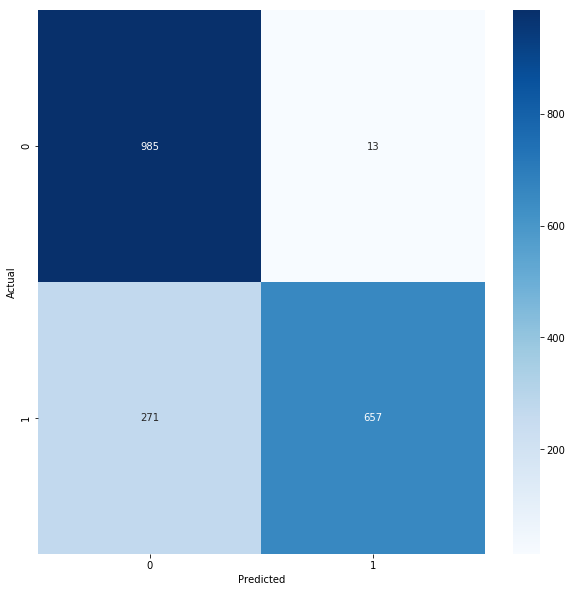

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')